Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [3]:
# cell for imports. All imports must go here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [5]:
def read_from_file_pandas(file_path):
    """
    Function to read from a file using the pandas library.

    Args:
        file_path (str): The path to the file to be read.

    Returns:
        pandas.DataFrame: The data read from the file as a pandas DataFrame.
    """
    try:
        data = pd.read_csv(file_path)
        return data
    except FileNotFoundError:
        return "File not found."

train = read_from_file_pandas('/content/train.csv')
print("Traint.csv columns info:")
print(train.info())

Traint.csv columns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [23]:
print("Traint.csv first 4 rows:")
print(train.head(4))

Traint.csv first 4 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

([<matplotlib.patches.Wedge at 0x7f88bdfed540>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'not survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

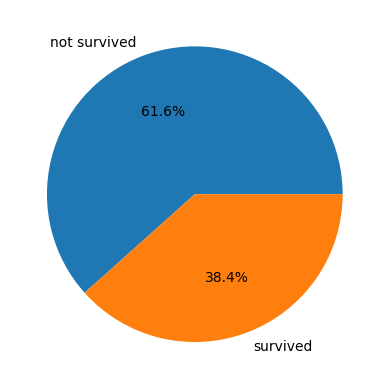

In [7]:
plt.pie(train.Survived.value_counts(), labels = ['not survived', 'survived'], autopct='%1.1f%%')


Візуалізація показує розподіл виживших та загиблих пасажирів Титаніка, чітко демонструє пропорцію між тими, хто вижив, і тими, хто не вижив. На діаграмі можна побачити, що близько 38.4% пасажирів вижили, тоді як 61.6% не вижили. Така візуалізація дозволяє швидко оцінити загальний розподіл даних та виразити його у вигляді простого та зрозумілого графіку.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


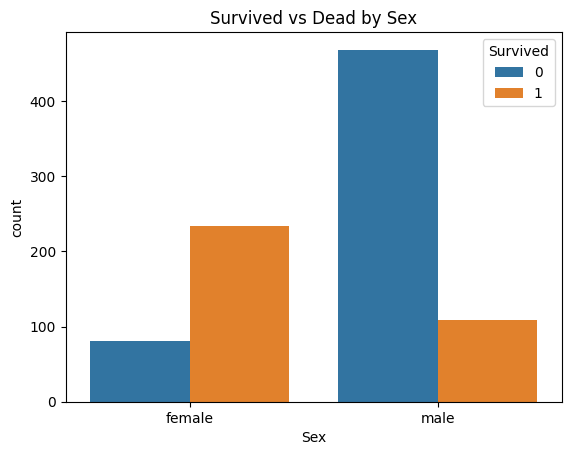

      Sex  Survived  size
0  female         0    81
1  female         1   233
2    male         0   468
3    male         1   109


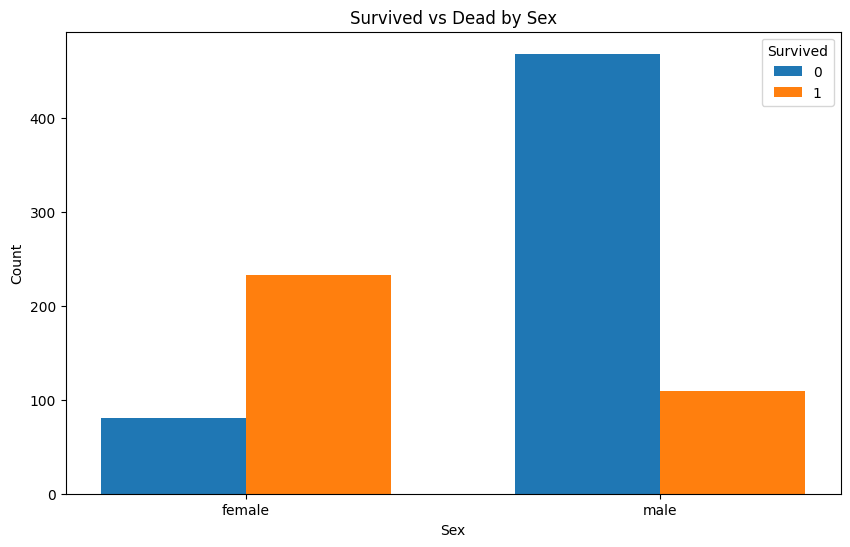

In [8]:
survival_by_sex = train.groupby(['Sex', 'Survived'], as_index=False).size()
print(survival_by_sex)

female_data = survival_by_sex[survival_by_sex['Survived'] == 0]
male_data = survival_by_sex[survival_by_sex['Survived'] == 1]

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = [0, 1]

plt.bar(index, female_data['size'], bar_width, label='0')
plt.bar([i + bar_width for i in index], male_data['size'], bar_width, label='1')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survived vs Dead by Sex')
plt.xticks([i + bar_width / 2 for i in index], ['female', 'male'])
plt.legend(title='Survived')

я візуалізація показує кількість пасажирів, які вижили та не вижили на борту Титаніка за статевою ознакою. Дані представлені у вигляді стовпчастої діаграми з розділенням на дві групи: жінки та чоловіки. Кожна група має два стовпці, які відповідають статусам виживання (0 - не вижив, 1 - вижив).

За наданими даними ми бачимо:

81 жінка не вижила, тоді як 233 жінки вижили.
468 чоловіків не вижило, тоді як лише 109 чоловіків вижило.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

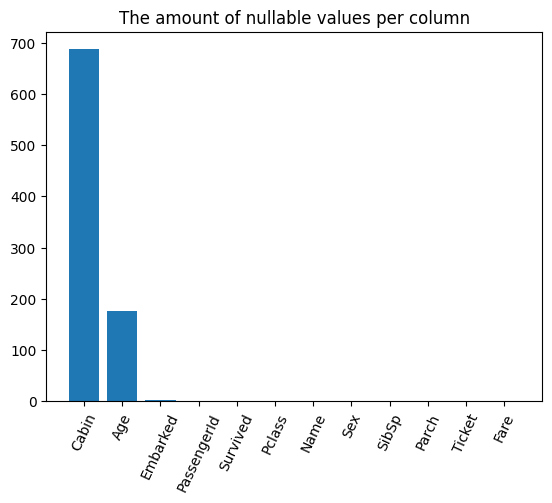

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


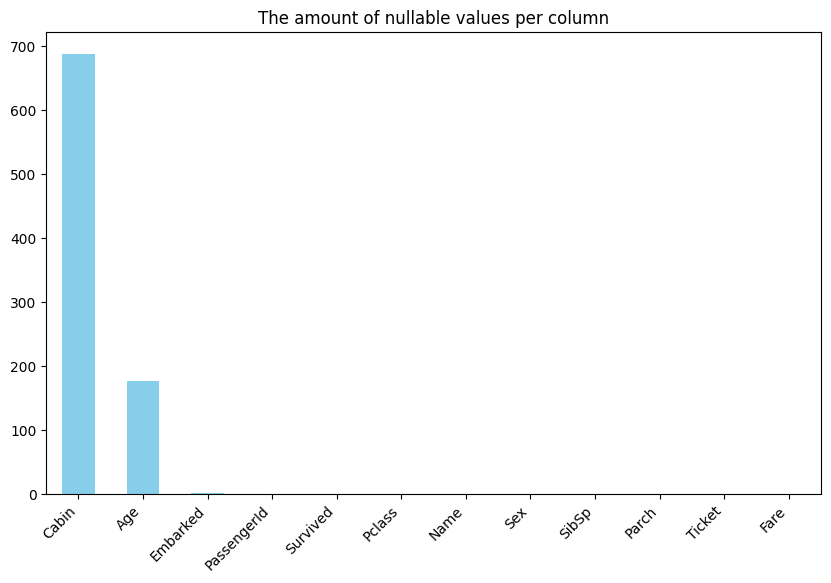

In [9]:
missing_values_count = train.isnull().sum()
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)
print(missing_values_count_sorted)

plt.figure(figsize=(10, 6))
missing_values_count_sorted.plot(kind='bar', color='skyblue')
plt.title('The amount of nullable values per column')
plt.xticks(rotation=45, ha='right')
plt.show()

Ця візуалізація показує кількість пропущених значень для кожної змінної у датасеті. Вище представлені результати сортування цих значень від максимального до мінімального:

Змінна "Cabin" має найбільшу кількість пропущених значень, яка становить 687.
Змінна "Age" має наступну за величиною кількість пропущених значень, яка становить 177.
Змінна "Embarked" має незначну кількість пропущених значень, яка становить 2.
Решта змінних ("PassengerId", "Survived", "Pclass", "Name", "Sex", "SibSp", "Parch", "Ticket", "Fare") не мають пропущених значень.
Ця візуалізація допомагає ідентифікувати змінні, які мають більше пропущених значень, що може бути важливо при подальшому аналізі даних та виборі стратегії їх обробки.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

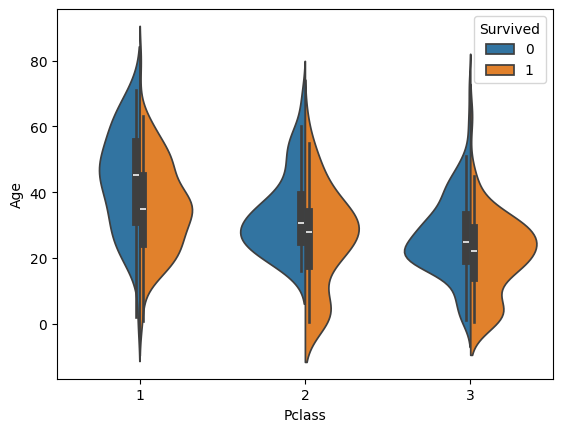

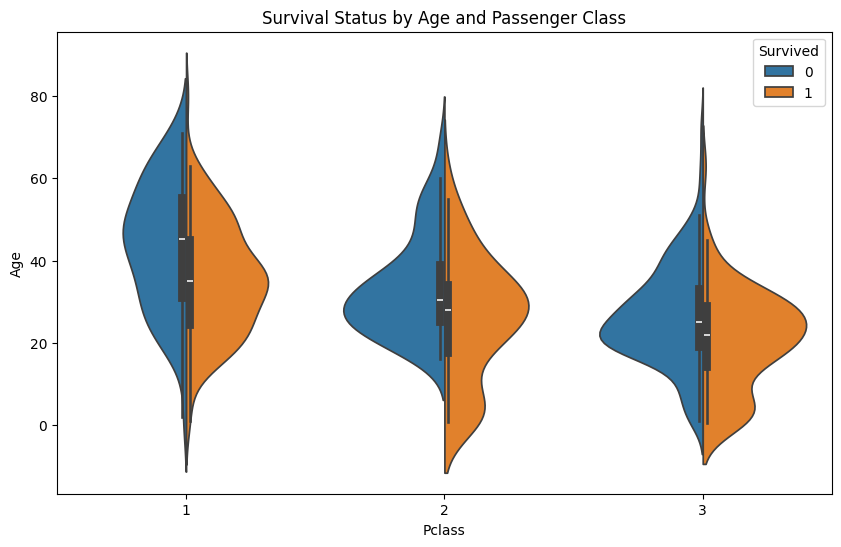

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train, split=True)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Survival Status by Age and Passenger Class')
plt.show()


Графік демонструє розподіл віку пасажирів у різних класах. Ми можемо бачити, як вік розподілений у межах кожного класу, зокрема, чи є які-небудь очевидні різниці у розподілі віку між класами.

 Кожний віолончельний графік розділений на дві частини, що представляють різний статус виживання: вижили та не вижили. Це дозволяє порівняти розподіл віку для кожного статусу виживання в межах кожного класу.

За допомогою цього графіку можна аналізувати, чи було відносно більше або менше виживших у певних вікових групах та в різних класах. Наприклад, чи є які-небудь очевидні вікові групи, у яких виживання більш ймовірне, або чи є відмінності у розподілі віку серед виживших та не виживших в різних класах.








6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


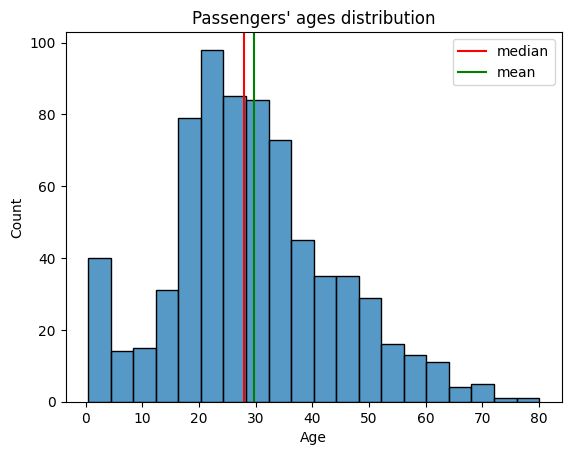

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


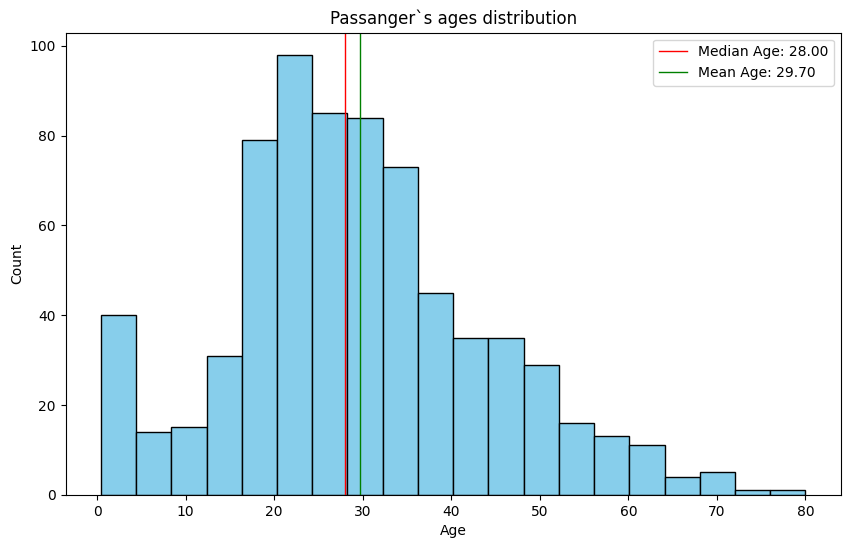

In [11]:
median_age = train['Age'].median()
mean_age = train['Age'].mean()

plt.figure(figsize=(10, 6))
plt.hist(train['Age'], bins=20, color='skyblue', edgecolor='black')
print(train['Age'])
plt.xlabel('Age')
plt.ylabel('Сount')
plt.title('Passanger`s ages distribution')

plt.axvline(median_age, color='red', linewidth=1, label='Median Age: {:.2f}'.format(median_age))
plt.axvline(mean_age, color='green', linewidth=1, label='Mean Age: {:.2f}'.format(mean_age))

plt.legend()



У цих даних представлений розподіл віку пасажирів на борту Титаніка. Кожен рядок відображає вік одного пасажира. Деякі пасажири мали пропущені значення віку, що позначено як NaN (Not a Number).

За цим розподілом можна зробити наступні спостереження:

Медіанний вік пасажирів становить 28 років. Це означає, що половина пасажирів була молодша 28 років, а половина - старша.
Середній (середньозважений) вік пасажирів становить приблизно 29,7 років. Це середнє арифметичне віку всіх пасажирів.
Ці статистичні показники можуть бути корисними для отримання загальної інформації про розподіл віку пасажирів та для порівняння його з іншими підгрупами або з іншими даними.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Бізнес-питання: Як розподілені пасажири за статтю в залежності від класу обслуговування на борту Титаніка?

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


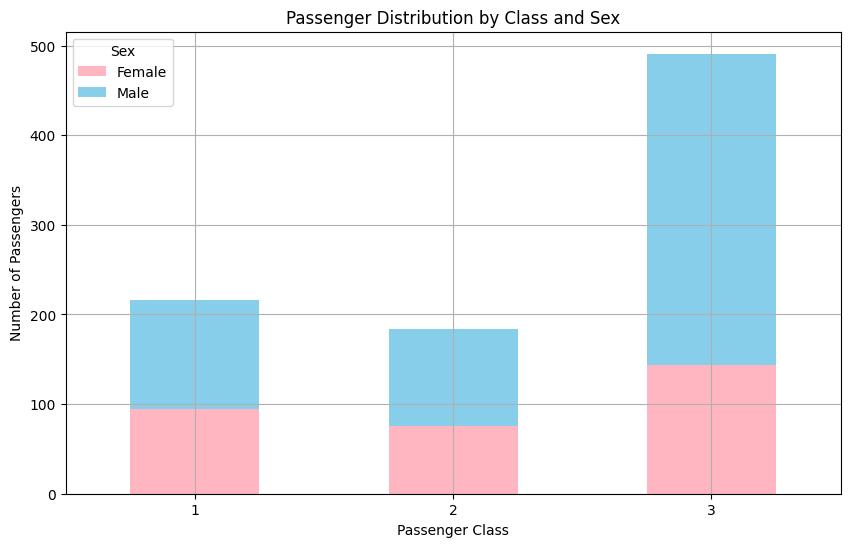

In [19]:
passenger_distribution = train.groupby(['Pclass', 'Sex']).size().unstack()
print(passenger_distribution)

passenger_distribution.plot(kind='bar', stacked=True, color=['lightpink', 'skyblue'], figsize=(10, 6))
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Passenger Distribution by Class and Sex')
plt.xticks(rotation=0)
plt.grid()
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()


Числа в діаграмі показують кількість пасажирів кожної статі в кожному класі обслуговування.
За цією візуалізацією можна помітити, що загалом більше чоловіків, ніж жінок, були на борту Титаніка.
У кожному класі обслуговування кількість чоловіків перевищує кількість жінок, проте ця різниця більш помітна в третьому класі.
У класі першого та другого обслуговування різниця між кількістю жінок та чоловіків менш помітна, але в першому та другому класі кількість чоловіків трохи перевищує кількість жінок.

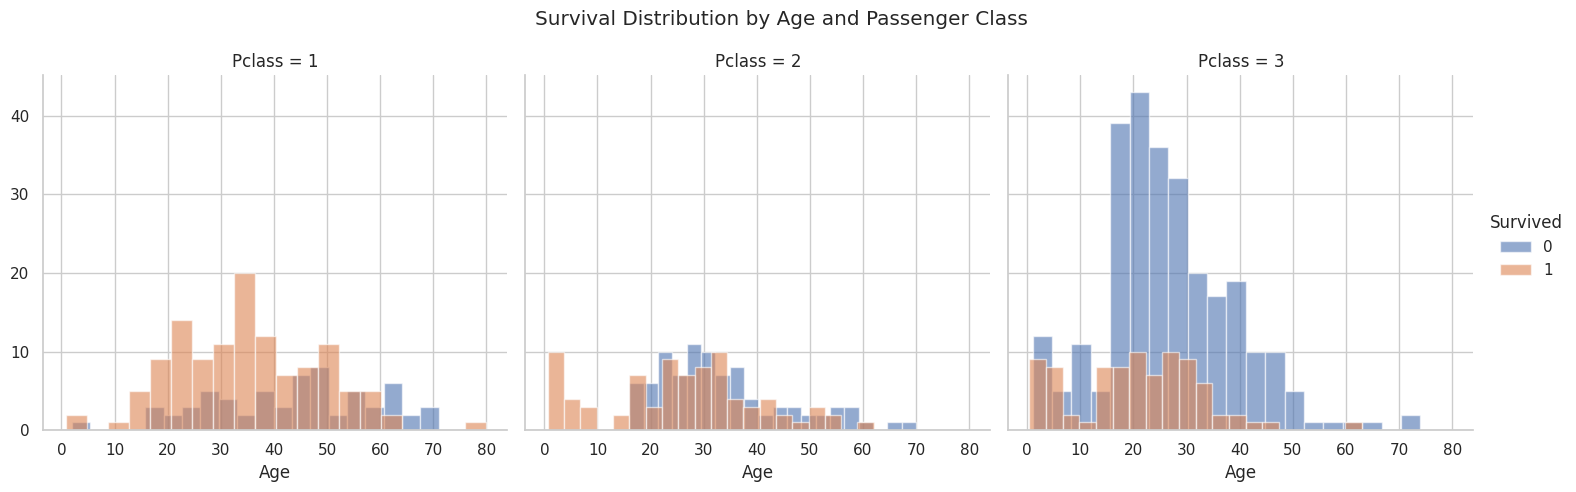

In [26]:
g = sns.FacetGrid(train, col='Pclass', hue='Survived', height=5)
g.map(plt.hist, 'Age', bins=20, alpha=0.6)
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival Distribution by Age and Passenger Class')
plt.show()

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

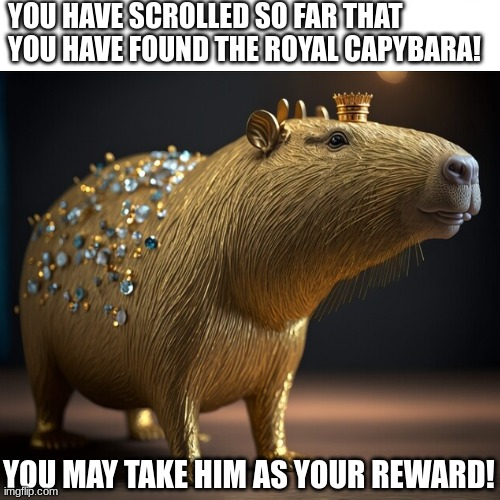